# 푸는 중...
# 이코테 chapter 13 DFS/BFS 문제
# 백준 14502.특정 거리의 도시 찾기
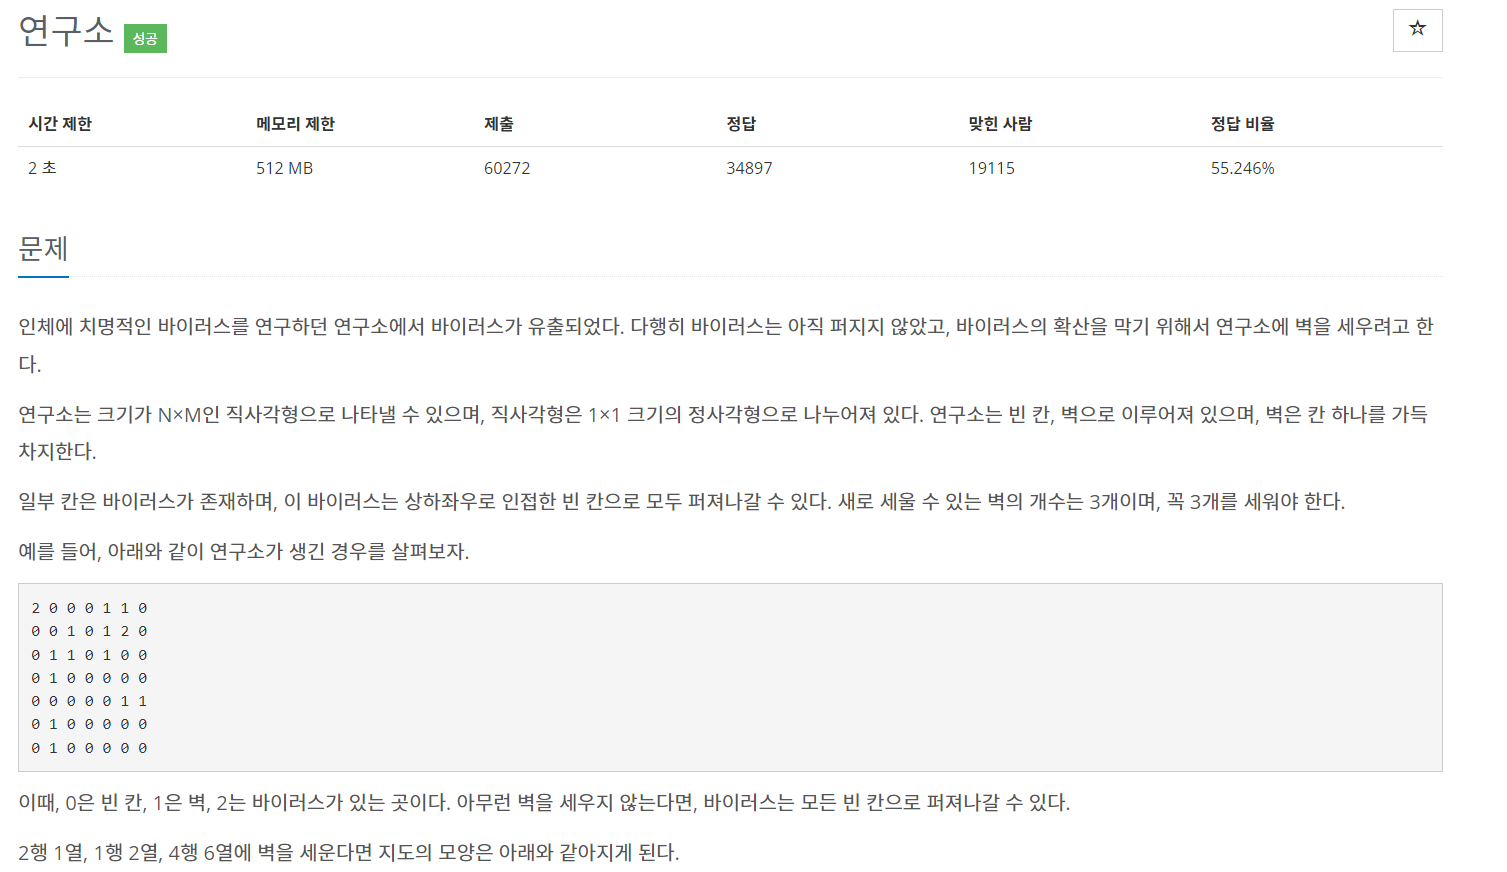
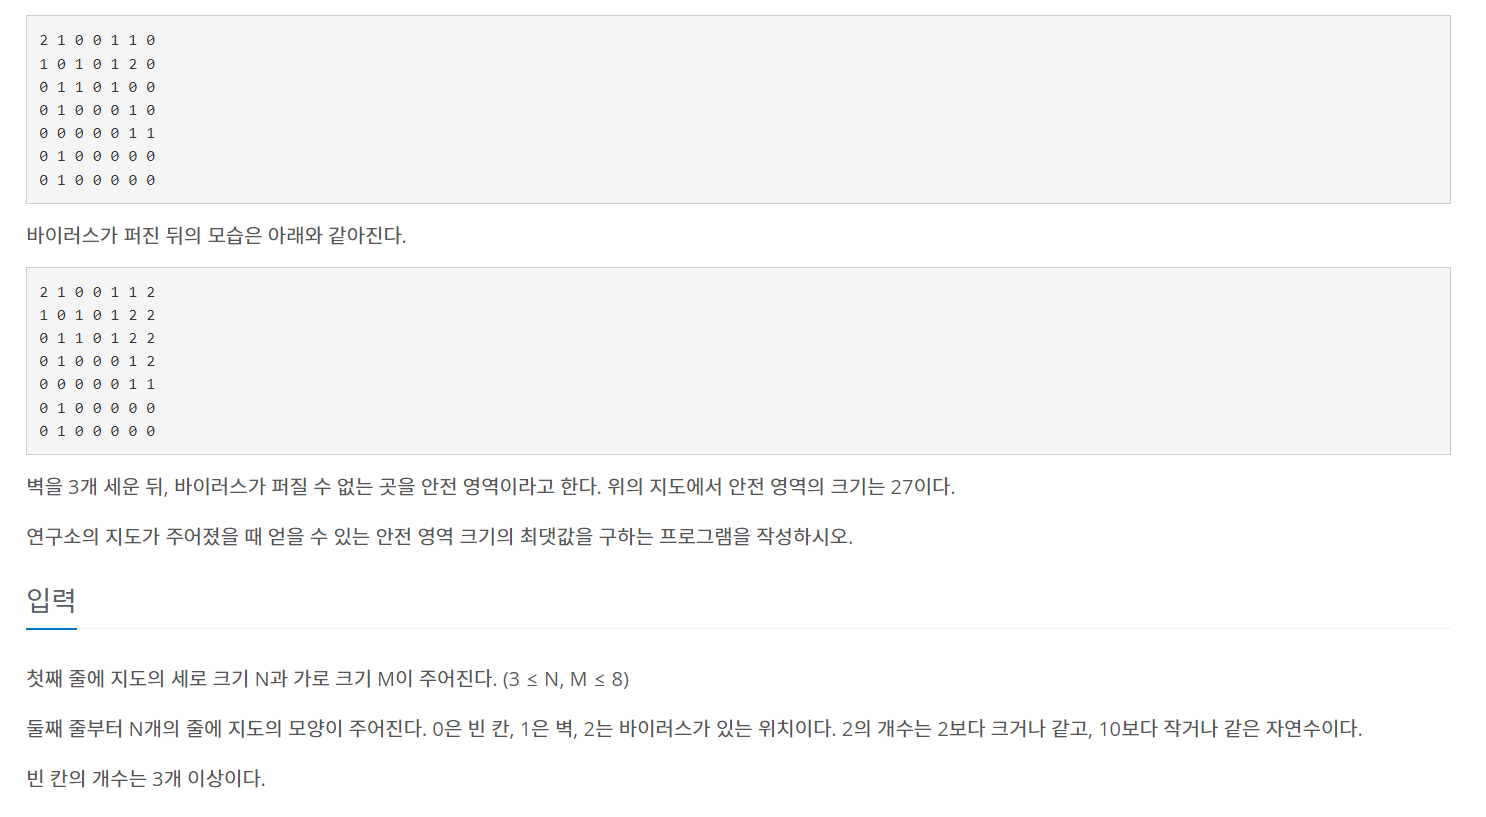
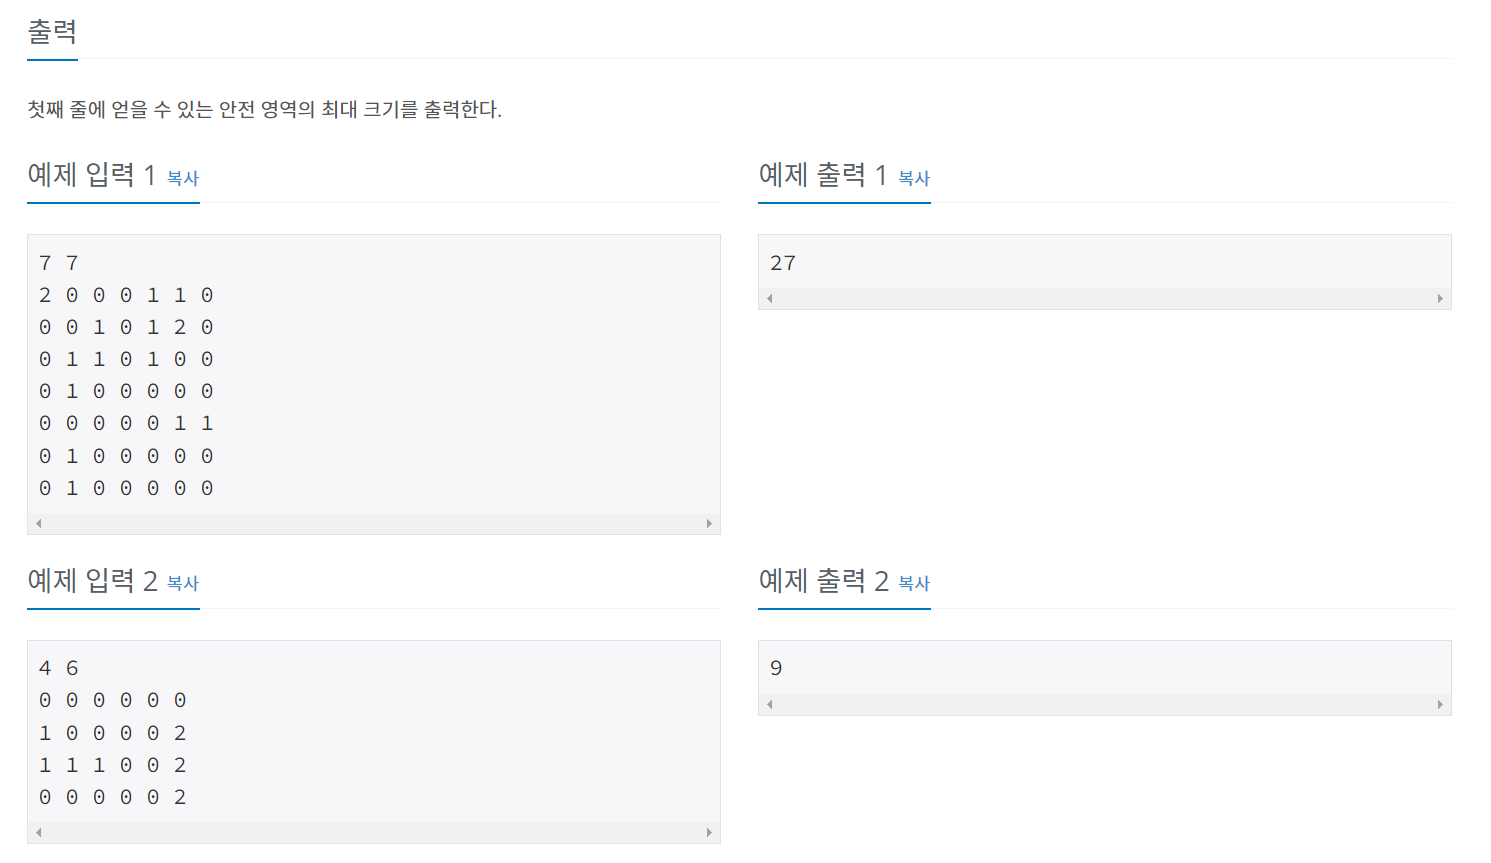
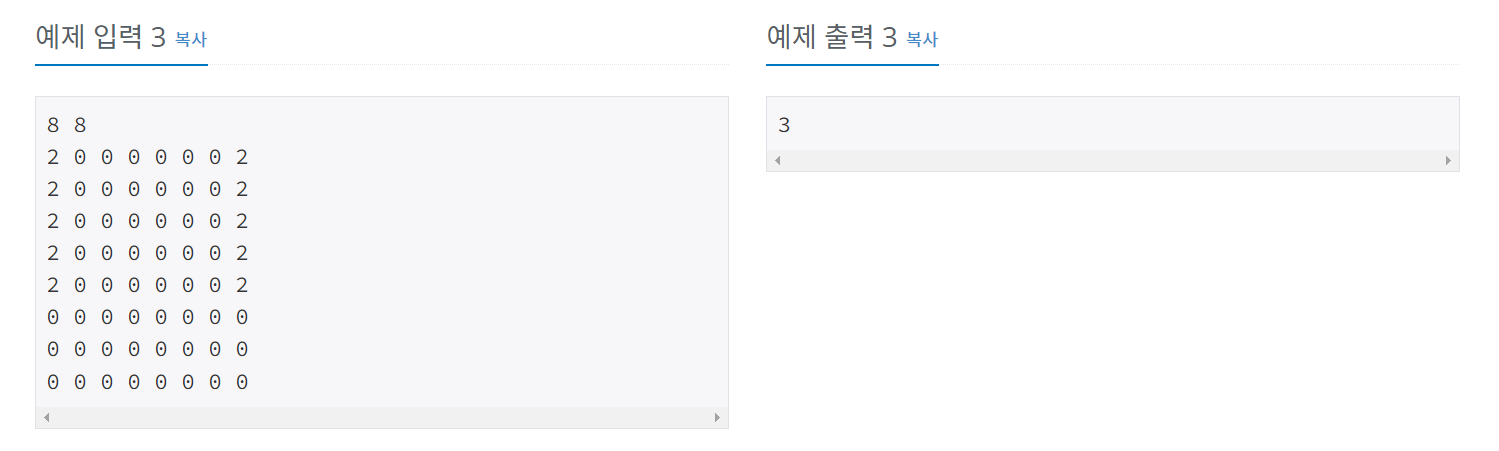

- `핵심 포인트1`:
- `핵심 포인트2`:
- `핵심 포인트3`:

In [ ]:
# 문제의 핵심
# 1. 3개의 울타리(0>1) map을 만드는 것이 1차적 목표 : 문제의 핵심
#    idea: 1과 대각선으로 좀 없애볼까? > dfs
# 2. 바이러스 퍼지는 부분
#    idea: 만든 map을 토대로 2 근처에서 좌,우로 봐서 0이면 2로 바꿔준다 > dfs
# 3. 안전한 지대 0의 갯수를 구한다 : 이 부분은 그냥 완전 탐색으로 0의 개수 구하기

# 그런데 사다리를 치는 경우의 수 중에 안정 영역이 가장 많은 것을 기준으로 뽑아야하기 때문에
# 안정영역을 세는 함수를 먼저 만들어야한다

In [1]:
4 6
0 0 0 0 0 0
1 0 0 0 0 2
1 1 1 0 0 2
1 1 1 0 0 2
0 0 0 0 0 2


SyntaxError: invalid syntax (CreatorTemp/ipykernel_19996/2700142491.py, line 1)

- `핵심 포인트1`: 감염하는 함수는 DFS나 BFS를 이용하면 쉽게 구현 가능
> ```python
> def infection(x, y):
    if x <= -1 or x >= row or y <= -1 or y >= col:
        return
    if graph[x][y] == 0:
        graph[x][y] = 2
        # 4가지 방향으로 이동
        infection(x-1, y)
        infection(x, y-1)
        infection(x+1, y)
        infection(x, y+1)
       
- `핵심 포인트2`: 남은 0의 개수는 행렬 전체를 돌면서(이중 for문 사용) 0의 개수를 센다.
>```python
>safe_area = 0
def area():
    global safe_area
    for i in range(row):
        for j in range(col):
            if graph[i][j] == 0:
                safe_area += 1
    return safe_area


In [11]:
row, col = map(int, input().split())

graph = []
for _ in range(row):
    graph.append(list(map(int, input().split())))
    
print('original_graph', graph)
    
# 핵심 포인트1: DFS 탐색으로 전염 함수 만들기
def infection(x, y):
    if x <= -1 or x >= row or y <= -1 or y >= col:
        return
    if graph[x][y] == 0:
        graph[x][y] = 2
        # 4가지 방향으로 이동
        infection(x-1, y)
        infection(x, y-1)
        infection(x+1, y)
        infection(x, y+1)
        
# 감염을 graph[0][0]인 지점부터 시작
infection(0, 0)
        
        
# 핵심 포인트2: 안정영역 크기의 값 구하기 > 함수화?
safe_area = 0
def area():
    global safe_area
    for i in range(row):
        for j in range(col):
            if graph[i][j] == 0:
                safe_area += 1
    return safe_area

area()
print('infected_graph', graph)
print('safe_area', safe_area)

4 6
0 0 0 0 1 0
1 0 0 1 0 2
1 1 1 0 0 2
0 0 0 1 0 2
original_graph [[0, 0, 0, 0, 1, 0], [1, 0, 0, 1, 0, 2], [1, 1, 1, 0, 0, 2], [0, 0, 0, 1, 0, 2]]
infected_graph [[2, 2, 2, 2, 1, 0], [1, 2, 2, 1, 0, 2], [1, 1, 1, 0, 0, 2], [0, 0, 0, 1, 0, 2]]
safe_area 8


- `문제점1`: 감염을 하고자하면 `어디서부터 전염을 시작`하는지를 분명하게 해야 한다.   
    - graph[0][0]부터 시작을 하게 되면 울타리가 충분히 쳐져있는 경우면서 2(바이러스 근원지)가 없는 곳도 감염시켜버린다.
    - 또한, 정작 2(바이러스 근원지)로부터의 전염이 이루어지지 않았다.
    > ```python   
    infection(0, 0)
    ```
- `해결책`: 시작 지점을 2가 있는 곳으로 잡아야 한다.
    - `original graph`   
      0 0 0 0 1 0   
      1 0 0 1 0 2   
      1 1 1 0 0 2   
      0 0 0 1 0 2  
    - #### 원하는`infected graph`   
      0 0 0 0 1 2   
      1 0 0 1 2 2   
      1 1 1 2 2 2   
      0 0 0 1 2 2   
    - #### 얻은 `infected graph`   
      2 2 2 2 1 0   
      1 2 2 1 0 2   
      1 1 1 0 0 2   
      0 0 0 1 0 2   
      ### 실패한 코드
    > ```python
    for i in range(row):
        for j in range(col):
            if graph[i][j] == 2:
                start_x, start_y = i, j
                break
            
    >```python
    infection(start_x, start_y)


In [13]:
row, col = map(int, input().split())

graph = []
for _ in range(row):
    graph.append(list(map(int, input().split())))
    
print('original_graph', graph)
    
# 핵심 포인트1: DFS 탐색으로 전염 함수 만들기
def infection(x, y):
    if x <= -1 or x >= row or y <= -1 or y >= col:
        return
    if graph[x][y] == 0:
        graph[x][y] = 2
        # 4가지 방향으로 이동
        infection(x-1, y)
        infection(x, y-1)
        infection(x+1, y)
        infection(x, y+1)
        
# 감염을 graph[i][j] == 2인 지점부터 시작
for i in range(row):
    for j in range(col):
        if graph[i][j] == 2:
            start_x, start_y = i, j
            break
  

print('start_x:', start_x, 'start_y:', start_y)
infection(start_x, start_y)
        
        
# 핵심 포인트2: 안정영역 크기의 값 구하기 > 함수화?
safe_area = 0
def area():
    global safe_area
    for i in range(row):
        for j in range(col):
            if graph[i][j] == 0:
                safe_area += 1
    return safe_area

area()
print('infected_graph', graph)
print('safe_area', safe_area)

4 6
0 0 0 0 1 0
1 0 0 1 0 2
1 1 1 0 0 2
0 0 0 1 0 2
original_graph [[0, 0, 0, 0, 1, 0], [1, 0, 0, 1, 0, 2], [1, 1, 1, 0, 0, 2], [0, 0, 0, 1, 0, 2]]
start_x: 3 start_y 5
infected_graph [[0, 0, 0, 0, 1, 0], [1, 0, 0, 1, 0, 2], [1, 1, 1, 0, 0, 2], [0, 0, 0, 1, 0, 2]]
safe_area 14


- `실패한 이유`: start_x와 start_y가 결국 마지막 2의 위치를 나타내기 때문이다.
- `해결`: graph[i][j]가 있는 지점마다 거기서부터 감염을 시작한다.

> ```python
for i in range(row):
    for j in range(col):
        if graph[i][j] == 2:
            infection(i, j)


In [2]:
row, col = map(int, input().split())

graph = []
for _ in range(row):
    graph.append(list(map(int, input().split())))
    
print('original_graph', graph)
    
# 핵심 포인트1: DFS 탐색으로 전염 함수 만들기
def infection(x, y):
    if x <= -1 or x >= row or y <= -1 or y >= col:
        return
    if graph[x][y] == 0:
        graph[x][y] = 2
        # 4가지 방향으로 이동
        infection(x-1, y)
        infection(x, y-1)
        infection(x+1, y)
        infection(x, y+1)
        
# 감염을 graph[i][j] == 2인 지점부터 시작
for i in range(row):
    for j in range(col):
        if graph[i][j] == 2:
            infection(i, j)
            print('i', i, 'j', j)
        
        
# 핵심 포인트2: 안정영역 크기의 값 구하기 > 함수화?
safe_area = 0
def area():
    global safe_area
    for i in range(row):
        for j in range(col):
            if graph[i][j] == 0:
                safe_area += 1
    return safe_area

area()
print('infected_graph', graph)
print('safe_area', safe_area)

4 6
0 0 0 0 1 0
1 0 0 1 0 2
1 1 1 0 0 2
0 0 0 1 0 2
original_graph [[0, 0, 0, 0, 1, 0], [1, 0, 0, 1, 0, 2], [1, 1, 1, 0, 0, 2], [0, 0, 0, 1, 0, 2]]
i 1 j 5
i 2 j 5
i 3 j 5
infected_graph [[0, 0, 0, 0, 1, 0], [1, 0, 0, 1, 0, 2], [1, 1, 1, 0, 0, 2], [0, 0, 0, 1, 0, 2]]
safe_area 14


- `실패`: 감염이 전혀 이루어지고 있지 않다.
- `실패한 이유`: graph[i][j] == 2인 지점부터 시작하는데 infection 함수에선 graph[i][j] == 0인 경우 주변을 4방향을 살피기 때문이다.
- ` 해결책`: 